# Lab 1 - FrozenLake MDP: Part 2 
# Assignment

- In this assignment you will learn how to tackle problems with limited state spaces.
- In particular we consider the FrozenLake MDP problem.

# Outline

- Part 0 introduces us to [gym](https://gymnasium.farama.org/), an environment that allows us to test our reinforcement learning algorithms in various problems
- In Part 1, you implemented a policy iteration algorithm (in previous homework HW1)
- In Part 2, you will implement Q-Learning and SARSA (This homework HW2) 

# Deliverable

Regarding the Lab:

- Make sure your code runs from top to bottom without any errors.
- Your submitted Notebook must contain saved outputs.

# Recall: FrozenLake-v1 environment in Gym
- We look [FrozenLake-v1 environment](https://gymnasium.farama.org/environments/toy_text/frozen_lake/) in gym. 
- You don't need to write any code for this part
- you should still understand the code to help you solve Part 2


In [1]:
import os
# You will need numpy and gym. You can try running the following lines to install them
# The assignment is tested on Python3.8 so in case you are having installation issues you might 
# want to try installing that version. 

# !{os.sys.executable} -m pip install numpy
# !{os.sys.executable} -m pip install gymnasium
# !{os.sys.executable} -m pip install Pillow
# !{os.sys.executable} -m pip install ipython
# !{os.sys.executable} -m pip install pygame

import gymnasium as gym
import numpy as np
from PIL import Image
from IPython.display import display

In [2]:
# Import the environment we will use in this assignment
env=gym.make('FrozenLake-v1',is_slippery=True, render_mode="rgb_array")

# Note: If you have installed the newest gym version, FrozenLake-v0 might not be available. In this case, instead of env=gym.make('FrozenLake-v0') you can use:
# env=gym.make('FrozenLake-v1',is_slippery=True)

# Show the model
print(f"Number of States {env.observation_space.n}, Number of Actions {env.action_space.n}")
print(f"Reward range {env.reward_range}")

Number of States 16, Number of Actions 4
Reward range (0, 1)


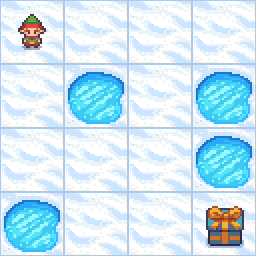

In [3]:
env.reset()
display(Image.fromarray(env.render()))

# Part 2 - Model-Free Control

Recall that in Part 1 you implemented Policy Iteration with Policy Evaluation and Policy Improvement. However this required knowledge of the model (i.e. `env.P`). In this section we study methods that do not require knowing the model.

# Q-Learning
* In this part you will implement Q-Learning with epsilon-greedy exploration to find the optimal policy.  
  * You can experiment with fixed and adaptive learning rate and epsilon
  * Report your best result and mention the differences you observed in answer to final questions


In [11]:
# Initialize Running Parameters. 
# You should try to maintain the *number of episodes* and *max length of episode* at these numbers for your final results
# However feel free to modify them for debugging purposes
num_episodes       = 5000
episode_max_length = 100

# initialize discount factor and learning rate
gamma     = 0.95
learnRate = 0.8

#create Q table
Q=np.zeros([env.observation_space.n,env.action_space.n]) #matrix Q[s,a]

reward_of_episodes = [] # list containing total reward of each episode (these rewards don't need to be discounted)
epsilon = 0.5
#execute in episodes
for episode in range(num_episodes):
    
    # reset the environment at the beginning of an episode
    state = env.reset()[0]
    total_reward = 0
    
    
    for t_sf in range(episode_max_length):
        
        ########### SELECT ACTION a for your current state using Q-values ##################
        
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state,:])
        # new state, reward, done
        newstate, reward, finished, _, _ = env.step(action)       
        total_reward += reward

        ##### update Q(state,action) ############
        Q[state, action] += learnRate*(reward + gamma*np.max(Q[newstate, :]) - Q[state, action])
        
        # stop if we have reached terminal state 
        if finished:
            break
        # update state
        state=newstate  
    reward_of_episodes.append(total_reward)
    learnRate /= 1.001
    epsilon /= 1.001

- Construct `reward_of_episodes`, a list with the total rewards of each episode (these rewards do not need to be discounted)
- Plot the moving average of the list
- Ideally you want to achieve a reward greater than 0.7 (the problem is technically considered solved for 0.78)

In [12]:
# You don't need to change the code here.
# you can use this function to plot the moving average of a list
from numpy import convolve, ones
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'valid')
from pylab import plot

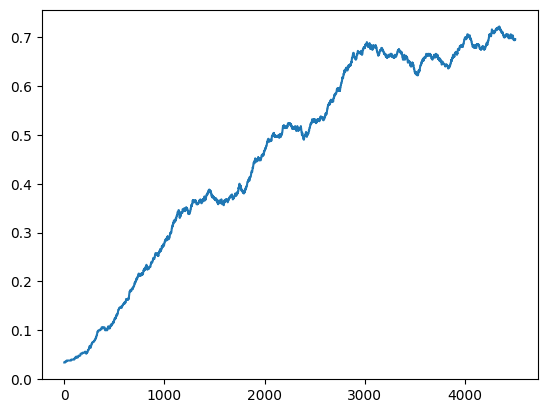

In [13]:
# Plot the moving average of total undiscounted reward across episodes here
rm=movingaverage(reward_of_episodes, 500)
plot(rm)

#  SARSA

- In the following you will implement SARSA with epsilon-greedy exploration.  
    - You can experiment with fixed and adaptive learning rate and epsilon
    - Report your best result and mention the differences you observed in answer to final questions

In [9]:
#initialize episodic structure - again try to maintain these two parameters as they are for your final submission
num_episodes=5000;
episode_max_length=100;

#initialize discount factor, learning rate
gamma=0.95
learnRate=0.8
epsilon = 0.5
#create Q table
Q=np.zeros([env.observation_space.n, env.action_space.n]) #matrix Q[s,a]

reward_of_episodes = [] # list containing total reward of each episode
def epsilon_greedy_policy(state, epsilon):
    if np.random.rand() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state,:])
    return action

#execute in episodes
for episode in range(num_episodes):
    
    # reset the environment at the beginning of an episode 
    # and other possible initializations here
    
    state = env.reset()[0]
    action = epsilon_greedy_policy(state, epsilon)
    total_reward = 0
   
    for t in range(episode_max_length):
        # take an action `action` and observe the next state ...
        newstate, reward, finished, _, _ = env.step(action)       
        total_reward += reward
        if finished:
            newq = 0
        else:
            newaction = epsilon_greedy_policy(newstate, epsilon)
            newq = Q[newstate, newaction]
        
        Q[state, action] += learnRate*(reward + gamma*newq - Q[state, action])

        if finished:
            break
        state = newstate
        action = newaction
    reward_of_episodes.append(total_reward)
    epsilon /= 1.001
    learnRate /= 1.001
    

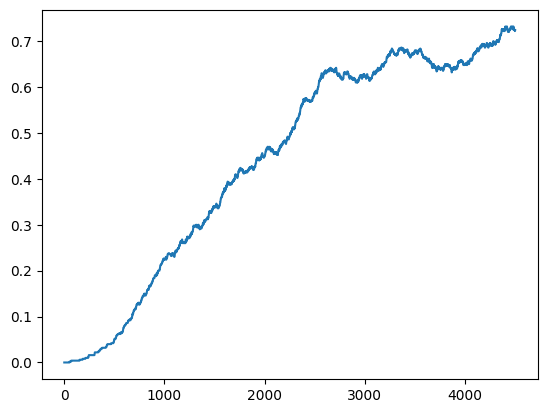

In [10]:
# Plot the moving average of total reward across episodes here
rm=movingaverage(reward_of_episodes, 500)
plot(rm)

#### How do your algorithms perform for different values of epsilon? Adaptive methods vs Fixed methods?
The algorithms do much better with adaptive epsilon. I go from about 0.3 to 0.7 moving average. For fixed methods, when you increase epsilong too high Sarsa does not learn anything and Q may learn less.

#### How do your algorithms perform for different values of the learning rate? Adaptive methods vs Fixed methods?
In both algorithms, adaptive learning rate is much better than fixed learning rate. I decrease by a factor of 0.001 every episode.

#### With a fixed epsilon and under identical learning rate rules and gamma value, compare the performance of Q-learning and SARSA. 
I left my graphs of my best results up but when I ran a test with constant epsilong 0.2 for both sarsa and Q I got a moving average of that ended up between 0.25 and 0.3 for both.